In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cd /content/drive/MyDrive/

In [3]:
! unzip /content/drive/MyDrive/Sampah

Archive:  /content/drive/MyDrive/Sampah.zip
   creating: Garbage/test/
   creating: Garbage/test/cardboard/
  inflating: Garbage/test/cardboard/cardboard_004.jpg  
  inflating: Garbage/test/cardboard/cardboard_008.jpg  
  inflating: Garbage/test/cardboard/cardboard_009.jpg  
  inflating: Garbage/test/cardboard/cardboard_011.jpg  
  inflating: Garbage/test/cardboard/cardboard_012.jpg  
  inflating: Garbage/test/cardboard/cardboard_014.jpg  
  inflating: Garbage/test/cardboard/cardboard_016.jpg  
  inflating: Garbage/test/cardboard/cardboard_022.jpg  
  inflating: Garbage/test/cardboard/cardboard_027.jpg  
  inflating: Garbage/test/cardboard/cardboard_039.jpg  
  inflating: Garbage/test/cardboard/cardboard_041.jpg  
  inflating: Garbage/test/cardboard/cardboard_044.jpg  
  inflating: Garbage/test/cardboard/cardboard_046.jpg  
  inflating: Garbage/test/cardboard/cardboard_053.jpg  
  inflating: Garbage/test/cardboard/cardboard_054.jpg  
  inflating: Garbage/test/cardboard/cardboard_072.jp

In [4]:
import tensorflow as tf
device_name=tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at:{}'.format(device_name))

Found GPU at:/device:GPU:0


In [5]:
import keras
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Model
from keras.applications import imagenet_utils
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image

In [6]:
myModel = keras.applications.mobilenet.MobileNet(input_shape=(224,224,3),weights='imagenet',include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [27]:
from keras.layers import Dense,Dropout,GlobalAveragePooling2D

x=myModel.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.75)(x)
x=Dense(512,activation='relu')(x)
y=Dense(5,activation='softmax')(x)

myNewModel=Model(inputs=myModel.input,outputs=y)

In [28]:
for layer in myNewModel.layers[:86]: # layer 0 sampai dengan 85 non trainable
    layer.trainable=False
for layer in myNewModel.layers[86:]: # layer 86 sampai dengan terakhir
    layer.trainable=True

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_set=ImageDataGenerator(preprocessing_function=preprocess_input)

train_set2=train_set.flow_from_directory(
    directory='/content/Garbage/Training',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=200,
    class_mode='categorical',
    shuffle=True)

Found 1746 images belonging to 5 classes.


In [11]:
val_set=ImageDataGenerator(preprocessing_function=preprocess_input)

val_set2=val_set.flow_from_directory(
    directory='/content/Garbage/test',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=200,
    class_mode='categorical',
    shuffle=True)

Found 497 images belonging to 5 classes.


In [29]:
opt = keras.optimizers.Adam(learning_rate=0.001)
myNewModel.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
history=myNewModel.fit(train_set2,epochs=20,batch_size=200,validation_data=val_set2)

Epoch 1/20
9/9 [==============================] - 9s 697ms/step - loss: 1.7413 - accuracy: 0.3809 - val_loss: 0.8137 - val_accuracy: 0.6660
Epoch 2/20
9/9 [==============================] - 7s 765ms/step - loss: 0.8132 - accuracy: 0.6735 - val_loss: 0.5907 - val_accuracy: 0.7807
Epoch 3/20
9/9 [==============================] - 6s 648ms/step - loss: 0.5986 - accuracy: 0.7703 - val_loss: 0.4543 - val_accuracy: 0.8511
Epoch 4/20
9/9 [==============================] - 7s 756ms/step - loss: 0.4761 - accuracy: 0.8133 - val_loss: 0.3854 - val_accuracy: 0.8692
Epoch 5/20
9/9 [==============================] - 6s 650ms/step - loss: 0.4447 - accuracy: 0.8356 - val_loss: 0.3549 - val_accuracy: 0.8551
Epoch 6/20
9/9 [==============================] - 7s 747ms/step - loss: 0.3958 - accuracy: 0.8471 - val_loss: 0.3356 - val_accuracy: 0.8652
Epoch 7/20
9/9 [==============================] - 6s 647ms/step - loss: 0.3567 - accuracy: 0.8688 - val_loss: 0.3219 - val_accuracy: 0.8712
Epoch 8/20
9/9 [====

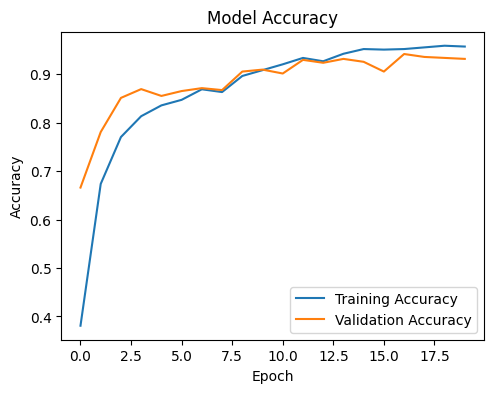

In [30]:
import matplotlib.pyplot as plt

# Membuat grafik akurasi
plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

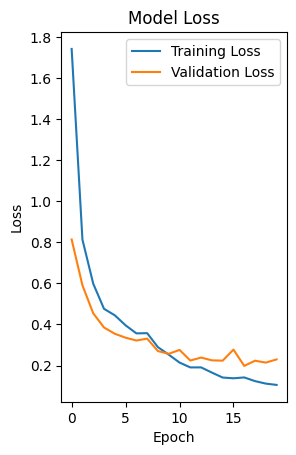

In [31]:
# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
val_loss, val_accuracy = myNewModel.evaluate(val_set2)

3/3 [==============================] - 4s 1s/step - loss: 0.2300 - accuracy: 0.9316


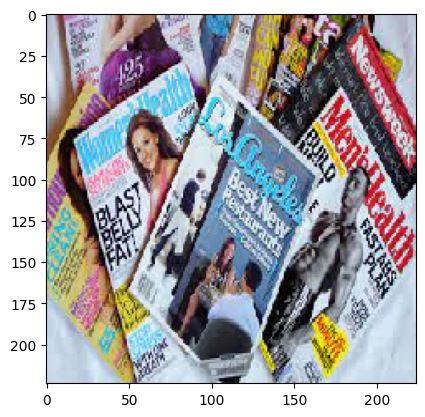

In [45]:
img = keras.utils.load_img('/content/images (3).jpg', target_size=(224, 224))
img_array = keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
gambar = keras.applications.mobilenet.preprocess_input(img_array)
plt.imshow(img)

In [46]:
predictions = myNewModel.predict(gambar)

1/1 [==============================] - 0s 23ms/step


In [47]:
np.round(predictions)

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [48]:
myNewModel.save('myNewModelSampah.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
